In [5]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
cleaned_df = pd.read_csv('processed_data.csv')
cleaned_df.head(10)

,Title,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,Price,ReleaseYear,...,Genre__RPG,Genre__Racing,Genre__Simulation,Genre__Software Training,Genre__Sports,Genre__Strategy,Genre__Utilities,Genre__Video Production,Genre__Web Publishing,Rating
0,Endless Monday: Dreams and Deadlines,0,0,2022,1581,737,737,0,142000.0,2023,...,0,0,0,0,0,0,0,0,0,0.931514
1,Papa's Freezeria Deluxe,0,0,592,470,6514,6562,48,87500.0,2023,...,0,0,1,0,0,1,0,0,0,0.957730
2,Cats Hidden in Jingle Jam,0,0,1819,1412,5097,5108,11,0.0,2023,...,0,0,0,0,0,0,0,0,0,0.959760
3,An Arcade Full of Cats,1,0,439,359,3018,3045,27,0.0,2023,...,0,0,0,0,0,0,0,0,0,0.947230
4,Ib,0,0,2036,1003,3068,3098,30,150000.0,2022,...,0,0,0,0,0,0,0,0,0,0.946714
5,Lil Gator Game,0,0,1074,1048,3363,3395,32,260000.0,2022,...,0,0,0,0,0,0,0,0,0,0.948134
6,星空列车与白的旅行,1,1,2076,1588,3056,3083,27,188000.0,2021,...,0,0,0,0,0,0,0,0,0,0.947493
7,Patrick's Parabox,1,0,1289,1015,2800,2820,20,260000.0,2022,...,0,0,0,0,0,1,0,0,0,0.947817
8,A Castle Full of Cats,1,0,439,359,2512,2526,14,36000.0,2022,...,0,0,0,0,0,0,0,0,0,0.947701
9,Dialtown: Phone Dating Sim,1,1,464,375,1316,1324,8,115000.0,2022,...,0,0,0,0,0,0,0,0,0,0.937228


##### Question 1: Câu hỏi đặt ra là đối với những game có downloadable content (withDLC) thì giá tiền cần để mua game đó có nhiều hơn những game không kèm theo downloadable content hay không, và điều này ảnh hưởng như thế nào đến *PositiveReview* và game *Rating*??

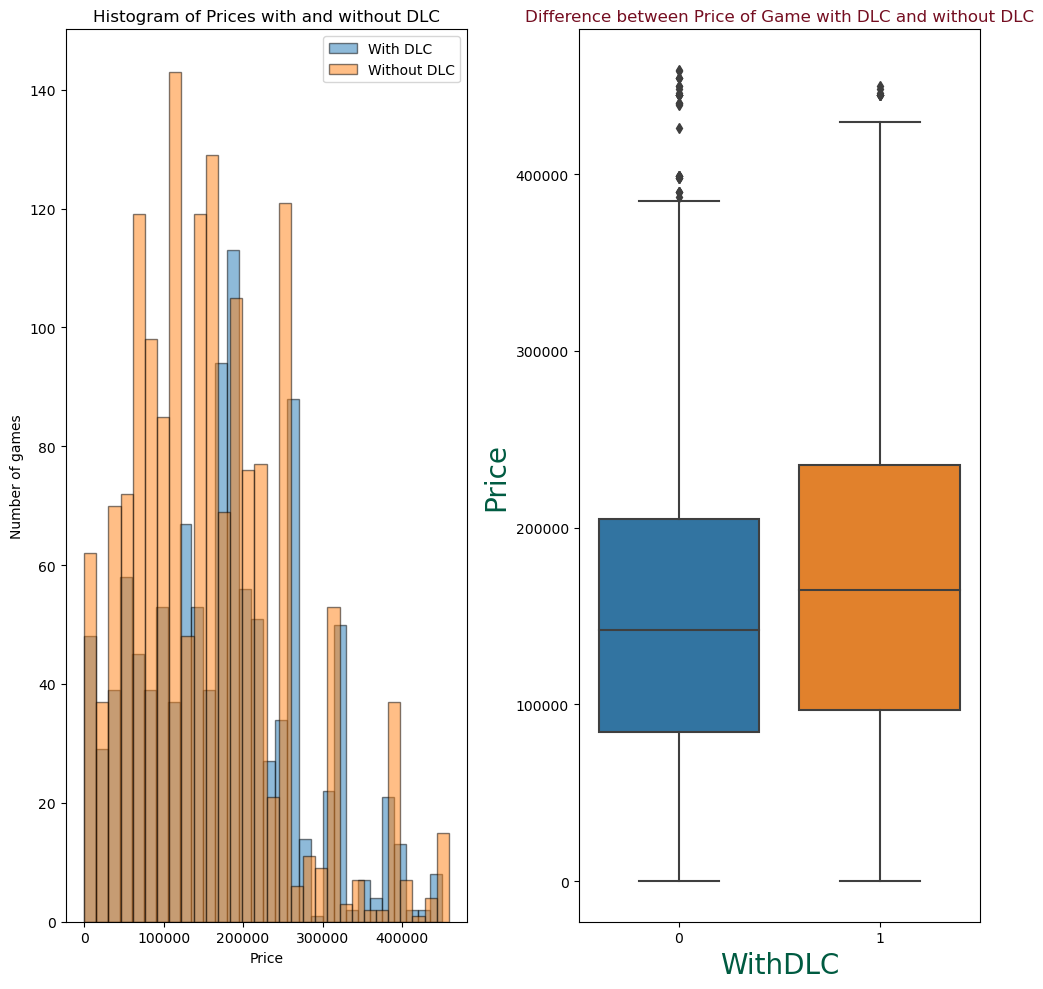

In [18]:
df_with_dlc = cleaned_df[cleaned_df['withDLC'] == 1]
df_without_dlc = cleaned_df[cleaned_df['withDLC'] == 0]

fig, axs = plt.subplots(1, 2, figsize = (10, 10))
axs[0].hist(df_with_dlc['Price'], bins = 30, alpha = 0.5, label = 'With DLC', edgecolor = 'black')
axs[0].hist(df_without_dlc['Price'], bins = 30, alpha = 0.5, label = 'Without DLC', edgecolor = 'black')
axs[0].legend(loc = 'upper right')
axs[0].set_title('Histogram of Prices with and without DLC')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Number of games')

sns.boxplot(x = 'withDLC', y = 'Price', data = cleaned_df, ax = axs[1])
axs[1].set_title('Difference between Price of Game with DLC and without DLC', color = '#750E21')
axs[1].set_xlabel('WithDLC', color = '#005B41', fontsize = 20)
axs[1].set_ylabel('Price', color = '#005B41', fontsize = 20)

plt.tight_layout()
plt.show()

In [14]:

print(df_with_dlc[['withDLC', 'Price']].describe())
print(df_without_dlc[['withDLC', 'Price']].describe())

       withDLC          Price
count   1116.0    1116.000000
mean       1.0  170246.353047
std        0.0   98459.491869
min        1.0       0.000000
25%        1.0   96625.000000
50%        1.0  165000.000000
75%        1.0  235250.000000
max        1.0  450000.000000
       withDLC          Price
count   1608.0    1608.000000
mean       0.0  155365.444652
std        0.0   93652.187254
min        0.0       0.000000
25%        0.0   84575.000000
50%        0.0  142000.000000
75%        0.0  205000.000000
max        0.0  459000.000000


##### Kết luận 1.1: Nhìn vào 2 biểu đồ boxplot và bảng dữ liệu trên, ta có thể thấy giá tiền của game có kèm theo downloadable content có xu hướng cao hơn những game không có mặc dù game không có DLC có số lượng nhiều hơn